In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats

# Memuat dataset
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes%20Missing%20Data.csv"
df = pd.read_csv(url)

In [6]:
# Menangani Missing Values
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])  

In [7]:
# Menangani Outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)] 

Text(0.5, 1.0, 'Histogram')

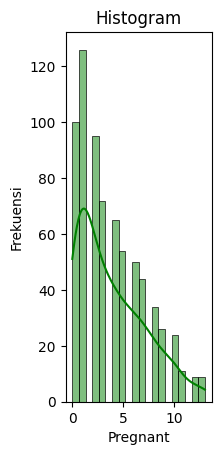

In [8]:
# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df_no_outliers.iloc[:, 0], bins=20, kde=True, color='g')
plt.xlabel(df_no_outliers.columns[0])
plt.ylabel("Frekuensi")
plt.title("Histogram")

C:\Users\Fahsa MPN\AppData\Local\Temp\ipykernel_33980\4213372775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fitur", y="Nilai", data=df_melted, estimator=np.mean, palette="viridis")


Text(0.5, 1.0, 'Bar Chart')

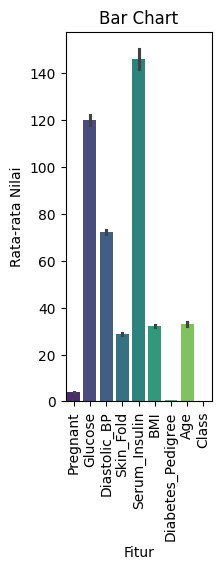

In [9]:
# Bar Chart (Fix)
plt.subplot(1, 3, 2)
df_melted = df_no_outliers.melt(var_name="Fitur", value_name="Nilai")
sns.barplot(x="Fitur", y="Nilai", data=df_melted, estimator=np.mean, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Rata-rata Nilai")
plt.xlabel("Fitur")
plt.title("Bar Chart")